In [1]:
import scanpy as sc
import SEACells
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.neighbors import NearestNeighbors

# Preparation of the adata agregation

In [2]:
adata = sc.read('C:/Users/MDV/Documents/Pipeline folder Yohan/scRNA/Output/annotation_finished_1_data_Xtrain/annotation_data_Xtrain.h5ad')

In [3]:
adata.X = adata.layers['log1p_norm_train'].copy()

In [4]:
adata.obs['SEACell'] = 'Unk'

In [5]:
adata.layers['raw_test'] = adata.layers['test'].copy()

In [6]:
adata.obs

,Sample,dpi,Id,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,...,ref_model_celltypist1_label,ref_model_celltypist1_score,ref_model_celltypist2_label,ref_model_celltypist2_score,_scvi_batch,_scvi_labels,overcluster,229E,CellType_assignated,SEACell
AAACAAGCAAGAACAAAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,4997,4997,8.516793,15760.0,9.665294,16.935279,0.0,...,Goblet (nasal),0.319114,Secretory_Goblet,0.999951,0,0,14,True,Superbasal,Unk
AAACAAGCACACTAAGAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,4357,4357,8.379769,14550.0,9.585415,26.054983,0.0,...,Goblet (nasal),0.951831,Secretory_Goblet,0.999886,0,0,4,False,Club cells,Unk
AAACAAGCACCGTTTGAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,6425,6425,8.768108,37675.0,10.536778,39.777040,0.0,...,Goblet (nasal),0.824988,Secretory_Goblet,0.999993,0,0,38,False,Club cells,Unk
AAACAAGCACTTCGATAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,4802,4802,8.476996,12024.0,9.394743,9.971723,0.0,...,Goblet (nasal),0.357202,Secretory_Goblet,0.999483,0,0,17,False,Goblet cells,Unk
AAACAAGCATGGTCAAAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,4699,4699,8.455318,15655.0,9.658609,23.027787,0.0,...,Goblet (nasal),0.602141,Secretory_Goblet,0.999654,0,0,32,False,Goblet cells,Unk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGACGTATCCGCAAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,5428,5428,8.599510,17390.0,9.763708,15.043128,0.0,...,Goblet (nasal),0.055499,Secretory_Goblet,0.987707,0,0,9,False,Superbasal,Unk
TTTGGACGTCCTCACTAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,6077,6077,8.712431,21812.0,9.990261,18.732808,0.0,...,Goblet (nasal),0.080242,Secretory_Goblet,0.998898,0,0,18,False,Club cells,Unk
TTTGGACGTCCTTCTAAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,5301,5301,8.575839,15610.0,9.655731,11.249199,0.0,...,Goblet (nasal),0.997562,Secretory_Goblet,1.000000,0,0,40,False,Superbasal,Unk
TTTGGACGTGTGATGAAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,5857,5857,8.675564,24456.0,10.104671,26.255316,0.0,...,Goblet (nasal),0.996979,Secretory_Goblet,0.999873,0,0,12,False,Club cells,Unk


In [7]:
metacell_dict = {}  # dictionary of metacells
n_SEACells  = 80    # number of meta cells per Id 
n_waypoint_eigs = 10

In [8]:
adata.obs[['CellType_assignated']].values

array([['Superbasal'],
       ['Club cells'],
       ['Club cells'],
       ...,
       ['Superbasal'],
       ['Club cells'],
       ['Club cells']], shape=(25300, 1), dtype=object)

In [9]:
%matplotlib inline

# Creation of the meta cells for each exp using X_train

Welcome to SEACells!
Computing kNN graph using scanpy NN ...


C:\Users\MDV\anaconda3\envs\seacells_env\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\MDV\anaconda3\envs\seacells_env\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\MDV\anaconda3\envs\seacells_env\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\MDV\anaconda3\envs\seacells_env\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\MDV\anaconda3\envs\seacells_env\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.Crea

Computing radius for adaptive bandwidth kernel...


  0%|          | 0/7142 [00:00<?, ?it/s]

Making graph symmetric...
Parameter graph_construction = union being used to build KNN graph...
Computing RBF kernel...


  0%|          | 0/7142 [00:00<?, ?it/s]

Building similarity LIL matrix...


  0%|          | 0/7142 [00:00<?, ?it/s]

Constructing CSR matrix...
Building kernel on X_scVI
Computing diffusion components from X_scVI for waypoint initialization ... 
Done.
Sampling waypoints ...
Done.
Selecting 70 cells from waypoint initialization.
Initializing residual matrix using greedy column selection
Initializing f and g...


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 144.21it/s]


Selecting 10 cells from greedy initialization.


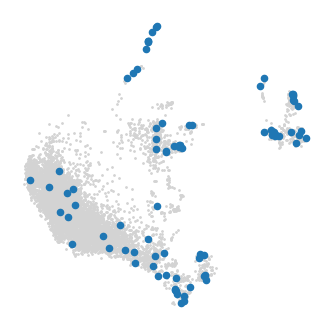

Randomly initialized A matrix.
Setting convergence threshold at 0.00156
Starting iteration 1.
Completed iteration 1.


KeyboardInterrupt: 

In [10]:
adata_copy = adata.copy()
#SEACells_adatas = []

for sample_id in adata.obs['Id'].unique():
    
    adata_sub = adata[adata.obs['Id'] == sample_id].copy() 
    adata_sub.obsm['X_scVI'] = adata.obsm['X_scVI'][adata.obs['Id'] == sample_id]

    model = SEACells.core.SEACells(adata_sub, 
                  build_kernel_on='X_scVI', 
                  n_SEACells=n_SEACells, 
                  n_waypoint_eigs=n_waypoint_eigs,
                  convergence_epsilon = 1e-5)
    model.construct_kernel_matrix()

    model.initialize_archetypes()
    SEACells.plot.plot_initialization(adata_sub, model)
    model.fit(min_iter=10, max_iter=50)
    model.plot_convergence()
    adata_copy.obs.loc[adata_copy.obs['Id'] == sample_id, 'SEACell'] = [f"{cell}_{sample_id}" for cell in adata_sub.obs['SEACell'].values]
    #SEACell_ad = SEACells.core.summarize_by_SEACell(adata_sub, SEACells_label='SEACell', summarize_layer='raw_test')
    #print(SEACell_ad)
    #SEACells_adatas += [SEACell_ad]
    
adata = adata_copy

In [ ]:
adata.obs

In [29]:
print(len(adata.obs['SEACell'].unique()))

320


In [30]:
os.makedirs('C:/Users/MDV/Documents/Pipeline folder Yohan/scRNA/Output/metacell_data_Xtrain', exist_ok = True)

In [31]:
adata.write_h5ad('C:/Users/MDV/Documents/Pipeline folder Yohan/scRNA/Output/metacell_data_Xtrain' + '/metacell_data_Xtrain.h5ad')

In [11]:
adata = sc.read('C:/Users/MDV/Documents/Pipeline folder Yohan/scRNA/Output/metacell_data_Xtrain/metacell_data_Xtrain.h5ad')

In [6]:
adata

AnnData object with n_obs × n_vars = 25300 × 13893
    obs: 'Sample', 'dpi', 'Id', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet_score_scDbFinder', 'doublet_class_scDbFinder', 'doublet_dbd', 'doublet_score_dbd', 'cell_type', 'Batch', 'predicted', 'transfer_score', 'ref_model_celltypist1_label', 'ref_model_celltypist1_score', 'ref_model_celltypist2_label', 'ref_model_celltypist2_score', '_scvi_batch', '_scvi_labels', 'overcluster', '229E', 'CellType_assignated', 'SEACell'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'CellType_assignated_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_overcluster', 'neighbors', 'overcluster', 'overcluster_colors', 'pca', 'predicted_colors', 'rank

# Agregation and sum of counts based of the meta cells using X_test

In [66]:
SEACell_ad = SEACells.core.summarize_by_SEACell(adata, SEACells_label='SEACell', summarize_layer='raw_test')
SEACell_ad

100%|███████████████████████████████████████████████████████████████████████████████| 320/320 [00:02<00:00, 115.95it/s]


AnnData object with n_obs × n_vars = 320 × 13893
    layers: 'raw'

C:\Users\test\anaconda3\envs\seacells\lib\site-packages\seaborn\relational.py:438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
C:\Users\test\anaconda3\envs\seacells\lib\site-packages\seaborn\relational.py:438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bit

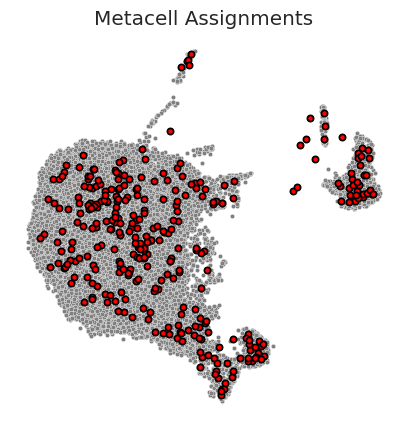

In [35]:
SEACells.plot.plot_2D(adata, key='X_umap', colour_metacells=False)

C:\Users\test\anaconda3\envs\seacells\lib\site-packages\seaborn\relational.py:438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
C:\Users\test\anaconda3\envs\seacells\lib\site-packages\seaborn\relational.py:438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bit

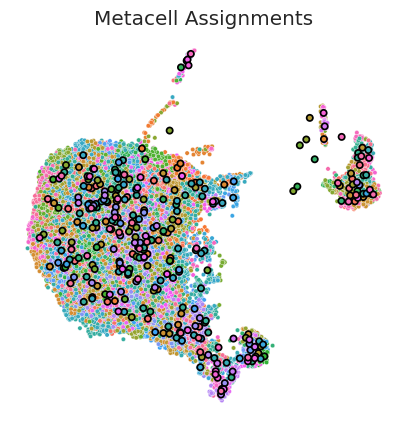

In [37]:
SEACells.plot.plot_2D(adata, key='X_umap', colour_metacells=True)

C:\Users\test\anaconda3\envs\seacells\lib\site-packages\seacells-0.3.3-py3.8.egg\SEACells\plot.py:130: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(label_df.groupby("SEACell").count().iloc[:, 0], bins=bins)
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.


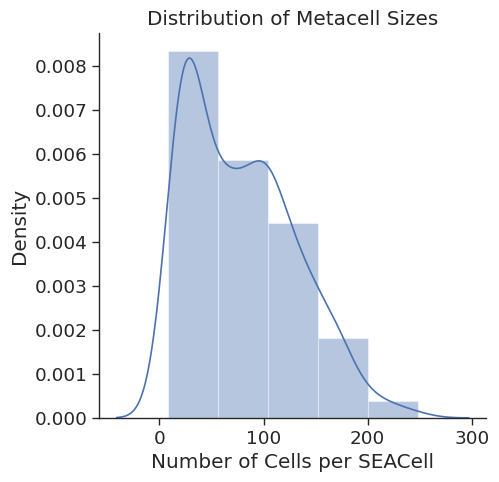

,size
SEACell,
SEACell-0_Inf_J3,11
SEACell-0_Inf_J6,126
SEACell-0_Mock_J3,48
SEACell-0_Mock_J6,75
SEACell-1_Inf_J3,106
...,...
SEACell-78_Mock_J6,22
SEACell-79_Inf_J3,145
SEACell-79_Inf_J6,36


In [5]:
SEACells.plot.plot_SEACell_sizes(adata, bins=5)

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

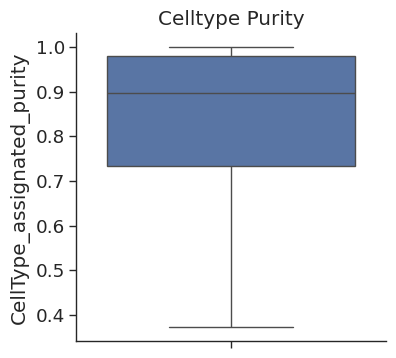

,CellType_assignated,CellType_assignated_purity
SEACell,,
SEACell-0_Inf_J3,Ciliated cells,1.000000
SEACell-0_Inf_J6,Superbasal,0.492063
SEACell-0_Mock_J3,Superbasal,1.000000
SEACell-0_Mock_J6,Goblet cells,0.840000
SEACell-1_Inf_J3,Goblet cells,0.632075


In [6]:
SEACell_purity = SEACells.evaluate.compute_celltype_purity(adata, 'CellType_assignated')

plt.figure(figsize=(4,4))
sns.boxplot(data=SEACell_purity, y='CellType_assignated_purity')
plt.title('Celltype Purity')
sns.despine()
plt.show()
plt.close()

SEACell_purity.head()

In [57]:
SEACell_purity[SEACell_purity['CellType_assignated_purity']>0.7]

,CellType_assignated,CellType_assignated_purity
SEACell,,
SEACell-0_Inf_J3,Ciliated cells,1.000000
SEACell-0_Mock_J3,Superbasal,1.000000
SEACell-0_Mock_J6,Goblet cells,0.840000
SEACell-1_Inf_J6,Club cells,0.779070
SEACell-1_Mock_J3,Goblet cells,0.936364
...,...,...
SEACell-78_Inf_J6,Goblet cells,0.933333
SEACell-78_Mock_J3,Club cells,0.943262
SEACell-79_Inf_J3,Goblet cells,0.924138


Determing nearest neighbor graph...


findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

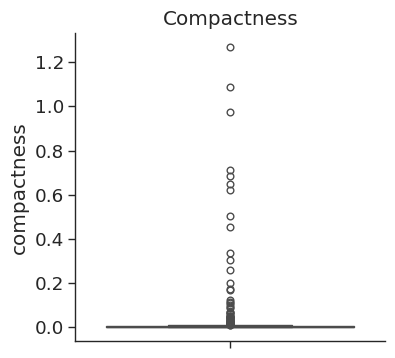

,compactness
SEACell,
SEACell-0_Inf_J3,0.009447
SEACell-0_Inf_J6,0.000040
SEACell-0_Mock_J3,0.000801
SEACell-0_Mock_J6,0.000005
SEACell-1_Inf_J3,0.000011


In [7]:
compactness = SEACells.evaluate.compactness(adata, 'X_scVI')

plt.figure(figsize=(4,4))
sns.boxplot(data=compactness, y='compactness')
plt.title('Compactness')
sns.despine()
plt.show()
plt.close()

compactness.head()

Determing nearest neighbor graph...


findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

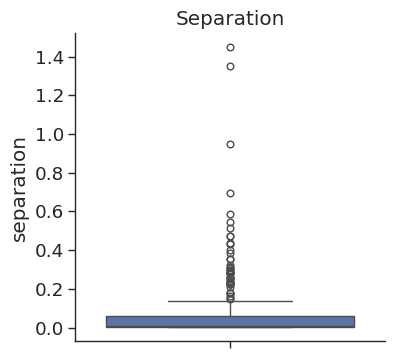

,separation
SEACell,
SEACell-0_Inf_J3,0.135973
SEACell-0_Inf_J6,0.004790
SEACell-0_Mock_J3,0.028548
SEACell-0_Mock_J6,0.001079
SEACell-1_Inf_J3,0.002926


In [8]:
separation = SEACells.evaluate.separation(adata, 'X_scVI',nth_nbr=1)

plt.figure(figsize=(4,4))
sns.boxplot(data=separation, y='separation')
plt.title('Separation')
sns.despine()
plt.show()
plt.close()

separation.head()

In [67]:
SEACell_ad.obs

""
SEACell-66_Inf_J3
SEACell-28_Inf_J3
SEACell-31_Inf_J3
SEACell-38_Inf_J3
SEACell-3_Inf_J3
...
SEACell-2_Mock_J6
SEACell-61_Mock_J6
SEACell-69_Mock_J6
SEACell-55_Mock_J6


In [68]:
os.makedirs('C:/Users/MDV/Documents/Pipeline folder Yohan/scRNA/Output/SEACell_matrix', exist_ok = True)

In [69]:
SEACell_ad.write_h5ad('C:/Users/MDV/Documents/Pipeline folder Yohan/scRNA/Output/SEACell_matrix' + '/SEACell_matrix.h5ad')

In [3]:
SEACell_ad = sc.read('C:/Users/MDV/Documents/Pipeline folder Yohan/scRNA/Output/SEACell_matrix/SEACell_matrix.h5ad')

In [139]:
SEACell_ad

AnnData object with n_obs × n_vars = 320 × 13893
    layers: 'raw'

In [140]:
SEACell_ad.obs['Purity'] = SEACell_purity['CellType_assignated_purity']

In [141]:
SEACell_ad.obs['Cell_type'] = SEACell_purity['CellType_assignated']

In [142]:
SEACell_ad.obs['Compactness'] = compactness['compactness']

In [143]:
SEACell_ad.obs['separation'] = separation['separation']

In [144]:
SEACell_ad.obs

,Purity,Cell_type,Compactness,separation
SEACell-66_Inf_J3,0.725610,Superbasal,0.000028,0.003656
SEACell-28_Inf_J3,0.699187,Club cells,0.000029,0.004791
SEACell-31_Inf_J3,0.608696,Superbasal,0.010393,0.063823
SEACell-38_Inf_J3,0.658683,Superbasal,0.000770,0.010183
SEACell-3_Inf_J3,0.899441,Goblet cells,0.000093,0.005436
...,...,...,...,...
SEACell-2_Mock_J6,0.631579,Undetermined serous cells,0.000076,0.020001
SEACell-61_Mock_J6,1.000000,Basal cells,0.003590,0.041939
SEACell-69_Mock_J6,1.000000,Basal cells,0.009930,0.045673
SEACell-55_Mock_J6,1.000000,Basal cells,0.006964,0.045673


In [145]:
SEACell_ad.obs['Cell_type'].unique()

array(['Superbasal', 'Club cells', 'Goblet cells', 'Ciliated cells',
       'Unk3', 'Basal cells', 'Undetermined serous cells', 'Unk2',
       'Ionocytes', 'Deuterosomal', 'Unk1'], dtype=object)

In [146]:
for _ in SEACell_ad.obs['Cell_type'].unique():
    mask = (SEACell_ad.obs['Cell_type'] == _)
    print(f'{_} : {sum(mask)}')

Superbasal : 80
Club cells : 31
Goblet cells : 84
Ciliated cells : 42
Unk3 : 3
Basal cells : 38
Undetermined serous cells : 22
Unk2 : 8
Ionocytes : 5
Deuterosomal : 2
Unk1 : 5


In [147]:
SEACell_ad.obs_names

Index(['SEACell-66_Inf_J3', 'SEACell-28_Inf_J3', 'SEACell-31_Inf_J3',
       'SEACell-38_Inf_J3', 'SEACell-3_Inf_J3', 'SEACell-22_Inf_J3',
       'SEACell-14_Inf_J3', 'SEACell-23_Inf_J3', 'SEACell-75_Inf_J3',
       'SEACell-5_Inf_J3',
       ...
       'SEACell-18_Mock_J6', 'SEACell-50_Mock_J6', 'SEACell-79_Mock_J6',
       'SEACell-60_Mock_J6', 'SEACell-72_Mock_J6', 'SEACell-2_Mock_J6',
       'SEACell-61_Mock_J6', 'SEACell-69_Mock_J6', 'SEACell-55_Mock_J6',
       'SEACell-70_Mock_J6'],
      dtype='object', length=320)

In [148]:
SEACell_ad.obs['sample'] = SEACell_ad.obs_names.str.split('_').str[1]

In [149]:
SEACell_ad.obs['dpi'] = SEACell_ad.obs_names.str.split('_').str[2]

In [150]:
SEACell_ad.obs['Id'] = SEACell_ad.obs['sample'] + '_' + SEACell_ad.obs['dpi']

In [151]:
SEACell_ad.obs

,Purity,Cell_type,Compactness,separation,sample,dpi,Id
SEACell-66_Inf_J3,0.725610,Superbasal,0.000028,0.003656,Inf,J3,Inf_J3
SEACell-28_Inf_J3,0.699187,Club cells,0.000029,0.004791,Inf,J3,Inf_J3
SEACell-31_Inf_J3,0.608696,Superbasal,0.010393,0.063823,Inf,J3,Inf_J3
SEACell-38_Inf_J3,0.658683,Superbasal,0.000770,0.010183,Inf,J3,Inf_J3
SEACell-3_Inf_J3,0.899441,Goblet cells,0.000093,0.005436,Inf,J3,Inf_J3
...,...,...,...,...,...,...,...
SEACell-2_Mock_J6,0.631579,Undetermined serous cells,0.000076,0.020001,Mock,J6,Mock_J6
SEACell-61_Mock_J6,1.000000,Basal cells,0.003590,0.041939,Mock,J6,Mock_J6
SEACell-69_Mock_J6,1.000000,Basal cells,0.009930,0.045673,Mock,J6,Mock_J6
SEACell-55_Mock_J6,1.000000,Basal cells,0.006964,0.045673,Mock,J6,Mock_J6


In [152]:
results = []
for _ in SEACell_ad.obs['Cell_type'].unique():
    for i in SEACell_ad.obs['Id'].unique():
        mask = (SEACell_ad.obs['Cell_type'] == _)&(SEACell_ad.obs['Id'] == i)
        count = sum(mask)
        results.append({'Cell_type': _, 'Id': i, 'Count': count})
df_results = pd.DataFrame(results)
df_pivot = df_results.pivot(index='Cell_type', columns='Id', values='Count')

In [153]:
df_pivot

Id,Inf_J3,Inf_J6,Mock_J3,Mock_J6
Cell_type,,,,
Basal cells,10,9,10,9
Ciliated cells,11,8,16,7
Club cells,15,4,6,6
Deuterosomal,0,1,1,0
Goblet cells,13,27,17,27
Ionocytes,1,1,2,1
Superbasal,17,23,16,24
Undetermined serous cells,6,7,4,5
Unk1,0,0,5,0


In [154]:
results = []
for _ in SEACell_ad.obs['Cell_type'].unique():
    for i in SEACell_ad.obs['Id'].unique():
        mask = (SEACell_ad.obs['Cell_type'] == _)&(SEACell_ad.obs['Id'] == i)&(SEACell_ad.obs['Purity']>0.7)
        count = sum(mask)
        results.append({'Cell_type': _, 'Id': i, 'Count': count})
df_results = pd.DataFrame(results)
df_pivot = df_results.pivot(index='Cell_type', columns='Id', values='Count')
df_pivot[''] = df_pivot.sum(axis=1)

df_pivot.loc[''] = df_pivot.sum()

In [155]:
df_pivot

Id,Inf_J3,Inf_J6,Mock_J3,Mock_J6,
Cell_type,,,,,
Basal cells,10,8,9,9,36
Ciliated cells,11,8,16,7,42
Club cells,11,4,6,6,27
Deuterosomal,0,0,0,0,0
Goblet cells,9,21,10,25,65
Ionocytes,1,1,2,1,5
Superbasal,9,16,12,15,52
Undetermined serous cells,5,5,3,4,17
Unk1,0,0,1,0,1


In [156]:
SEACell_ad.obs

,Purity,Cell_type,Compactness,separation,sample,dpi,Id
SEACell-66_Inf_J3,0.725610,Superbasal,0.000028,0.003656,Inf,J3,Inf_J3
SEACell-28_Inf_J3,0.699187,Club cells,0.000029,0.004791,Inf,J3,Inf_J3
SEACell-31_Inf_J3,0.608696,Superbasal,0.010393,0.063823,Inf,J3,Inf_J3
SEACell-38_Inf_J3,0.658683,Superbasal,0.000770,0.010183,Inf,J3,Inf_J3
SEACell-3_Inf_J3,0.899441,Goblet cells,0.000093,0.005436,Inf,J3,Inf_J3
...,...,...,...,...,...,...,...
SEACell-2_Mock_J6,0.631579,Undetermined serous cells,0.000076,0.020001,Mock,J6,Mock_J6
SEACell-61_Mock_J6,1.000000,Basal cells,0.003590,0.041939,Mock,J6,Mock_J6
SEACell-69_Mock_J6,1.000000,Basal cells,0.009930,0.045673,Mock,J6,Mock_J6
SEACell-55_Mock_J6,1.000000,Basal cells,0.006964,0.045673,Mock,J6,Mock_J6


In [157]:
SEACell_ad

AnnData object with n_obs × n_vars = 320 × 13893
    obs: 'Purity', 'Cell_type', 'Compactness', 'separation', 'sample', 'dpi', 'Id'
    layers: 'raw'

In [158]:
os.makedirs('C:/Users/MDV/Documents/Pipeline folder Yohan/scRNA/Output/ad_seacell_wlabels', exist_ok = True)

In [159]:
SEACell_ad.write_h5ad('C:/Users/MDV/Documents/Pipeline folder Yohan/scRNA/Output/ad_seacell_wlabels' + '/ad_seacell_wlabels.h5ad')

AnnData object with n_obs × n_vars = 320 × 13893
    obs: 'Purity', 'Cell_type', 'Compactness', 'separation', 'sample', 'dpi', 'Id'
    var: 'n_cells'